# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-площади,-цены,-числа-комнат,-высоты-потолков" data-toc-modified-id="Анализ-площади,-цены,-числа-комнат,-высоты-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ площади, цены, числа комнат, высоты потолков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-времени-продажи-квартиры" data-toc-modified-id="Анализ-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ времени продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Зависимость-цены-от-квадратного-метра,-числа-комнат,-этажа,-удалённости-от-центра" data-toc-modified-id="Зависимость-цены-от-квадратного-метра,-числа-комнат,-этажа,-удалённости-от-центра-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Зависимость цены от квадратного метра, числа комнат, этажа, удалённости от центра</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-10-населённых-пунктов-с-наибольшим-числом-объявлений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ 10 населённых пунктов с наибольшим числом объявлений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-квартир-в-Санкт-Петербурге" data-toc-modified-id="Анализ-квартир-в-Санкт-Петербурге-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ квартир в Санкт-Петербурге</a></span><ul class="toc-item"><li><span><a href="#Сравнительный-анализ" data-toc-modified-id="Сравнительный-анализ-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Сравнительный анализ</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8903,2,3050000.0,46.2,2017-06-16T00:00:00,2,2.56,5.0,29.70,5,NaN,...,6.70,0.0,Санкт-Петербург,21740.0,14469.0,0.0,NaN,0.0,NaN,42.0
16556,10,3250000.0,26.6,2016-06-30T00:00:00,1,NaN,25.0,19.60,20,NaN,...,NaN,0.0,Санкт-Петербург,33917.0,15016.0,0.0,NaN,1.0,1016.0,61.0
15315,20,9500000.0,63.0,2017-04-18T00:00:00,2,NaN,22.0,30.00,22,NaN,...,12.00,1.0,Санкт-Петербург,35847.0,15853.0,0.0,NaN,0.0,NaN,85.0
593,20,4200000.0,38.3,2019-04-16T00:00:00,1,2.60,16.0,19.80,10,NaN,...,10.10,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22848,6,5540000.0,70.9,2018-03-04T00:00:00,3,NaN,19.0,37.50,6,NaN,...,11.50,NaN,Санкт-Петербург,41929.0,21245.0,0.0,NaN,1.0,500.0,341.0
6923,0,3300000.0,32.0,2017-10-15T00:00:00,1,2.50,12.0,17.40,5,NaN,...,7.00,0.0,Санкт-Петербург,51337.0,14604.0,0.0,NaN,0.0,NaN,17.0
315,8,13900000.0,108.0,2018-09-29T00:00:00,4,NaN,6.0,76.90,2,False,...,11.20,NaN,Санкт-Петербург,25301.0,3876.0,1.0,320.0,0.0,NaN,156.0
5262,6,7500000.0,58.0,2017-02-14T00:00:00,2,NaN,9.0,31.10,1,NaN,...,10.10,1.0,Санкт-Петербург,49136.0,16806.0,0.0,NaN,0.0,NaN,17.0
15738,17,34551000.0,103.2,2016-06-18T00:00:00,4,NaN,8.0,58.82,6,NaN,...,14.72,1.0,Санкт-Петербург,27102.0,7442.0,2.0,164.0,2.0,473.0,205.0
5953,11,8250000.0,62.5,2016-05-15T00:00:00,2,NaN,22.0,30.80,12,NaN,...,11.50,0.0,Санкт-Петербург,42813.0,12689.0,1.0,343.0,0.0,NaN,58.0


In [5]:
data.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.369900e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.541549e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.088701e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.800000e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [7]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_apartment,20924,0.88
parks_nearest,15620,0.66
ponds_nearest,14589,0.62
balcony,11519,0.49
ceiling_height,9195,0.39
airports_nearest,5542,0.23
cityCenters_nearest,5519,0.23
ponds_around3000,5518,0.23
parks_around3000,5518,0.23
days_exposition,3181,0.13


### Вывод

Достаточно интересный набор данных, однако в нем есть несколько замечаний, требующих предобработки:
* Довольно много столбцов с отсутствующими значениями
* Для некоторых столбцов установлены неправильные типы данных

Описание полей исходного файла:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images * — число фотографий квартиры в объявлении

## Предобработка данных

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype(bool)

data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [9]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], 
    format='%Y-%m-%dT%H:%M:%S'
)

In [10]:
def get_city_centers_nearest_cat(x):
    if x < 0:
        return 'Не знаем'
    elif x < 2000:
        return 'Центр'
    elif x < 5000:
        return 'Близко к центру'
    elif x < 20000:
        return 'В пределах города'
    
    return 'Область'
    

data['city_centers_nearest_cat'] = (
    data['cityCenters_nearest'].fillna(-1)
    .apply(get_city_centers_nearest_cat)
)

In [11]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [12]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [13]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [14]:
data['last_price'] = data['last_price'].astype('int')

In [15]:
data = data.query('ceiling_height > 1 & ceiling_height < 10').reset_index(drop=True)

### Вывод

1. Был заменены пропущенные значения в столбце `is_apartment` на параметр False, потому что, скорее всего, если не указано значение True, то помещение не является апартаментом. 
2. Далее был преобразован из текстового значения в формат даты столбец `first_day_exposition`, для удобства дальнейшего использования.
3. Был добавлен новый столбец `city_centers_nearest_cat`, составленный из категоризованных значений столбца `cityCenters_nearest`.

Все остальные преобразования посчитал неуместными в рамках анализа, потому что у нас очень много пропущенных значений и заменять их на среднее, медиану или 0 - некорректно (может сказаться на результатах исследования).

## Расчёты и добавление результатов в таблицу

In [16]:
data['price_square_meter'] = round(data['last_price'] / data['total_area'], 2)
data['price_square_meter'].describe()

count    1.446400e+04
mean     1.016057e+05
std      5.049090e+04
min      1.118300e+02
25%      7.843137e+04
50%      9.671690e+04
75%      1.165575e+05
max      1.736842e+06
Name: price_square_meter, dtype: float64

In [17]:
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [18]:
def get_floor_cat(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    
    return 'Другой'


data['floor_category'] = data.apply(get_floor_cat, axis = 1)
data['floor_category'].value_counts()

Другой       10563
Последний     2083
Первый        1818
Name: floor_category, dtype: int64

In [19]:
data['living_area_part'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_part'] = round(data['kitchen_area'] / data['total_area'], 2)

### Вывод

Данные были дополнены следующими параметрами:
1. Цена квадратного метра: `price_square_meter`
2. День недели, месяц и год публикации объявления: `week_day`, `month`, `year`
3. Этаж квартиры (первый, последний, другой): `floor_category`
4. Cоотношение жилой и общей площади: `living_area_part`
5. Отношение площади кухни к общей: `kitchen_area_part`

## Исследовательский анализ данных

### Анализ площади, цены, числа комнат, высоты потолков

In [20]:
col_names = ['total_area', 'last_price', 'rooms', 'ceiling_height']
figsize = (16, 8)

data[col_names].describe().round(2)

,total_area,last_price,rooms,ceiling_height
count,14464.00,1.446400e+04,14464.00,14464.00
mean,61.90,6.837669e+06,2.14,2.73
std,37.02,1.019322e+07,1.10,0.29
min,12.00,1.219000e+04,0.00,1.20
25%,41.00,3.570000e+06,1.00,2.51
50%,53.38,4.850000e+06,2.00,2.65
75%,71.30,7.000000e+06,3.00,2.80
max,900.00,4.200000e+08,16.00,8.30


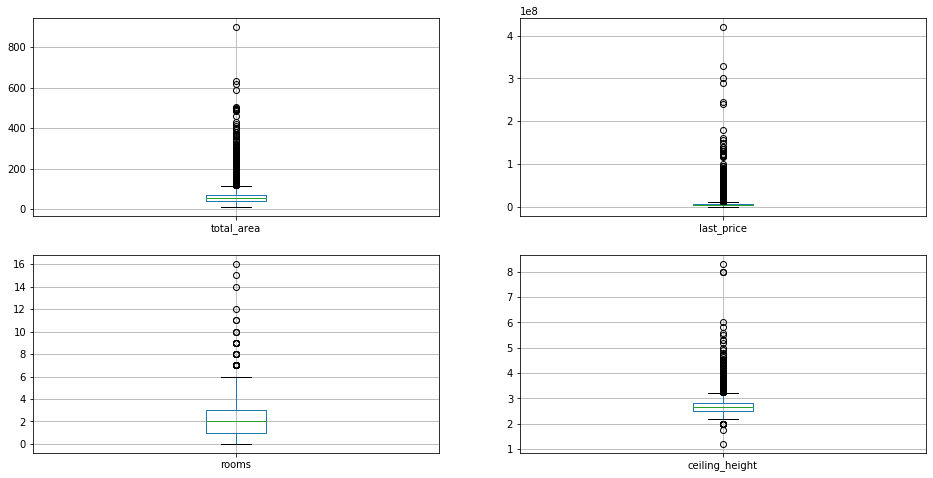

In [21]:
fig, axes = plt.subplots(2, 2, figsize=figsize)

y = 0
for col_name in col_names:
    i, j = divmod(y, 2)
    data.boxplot(column=[col_name], ax = axes[i, j])
    y = y + 1

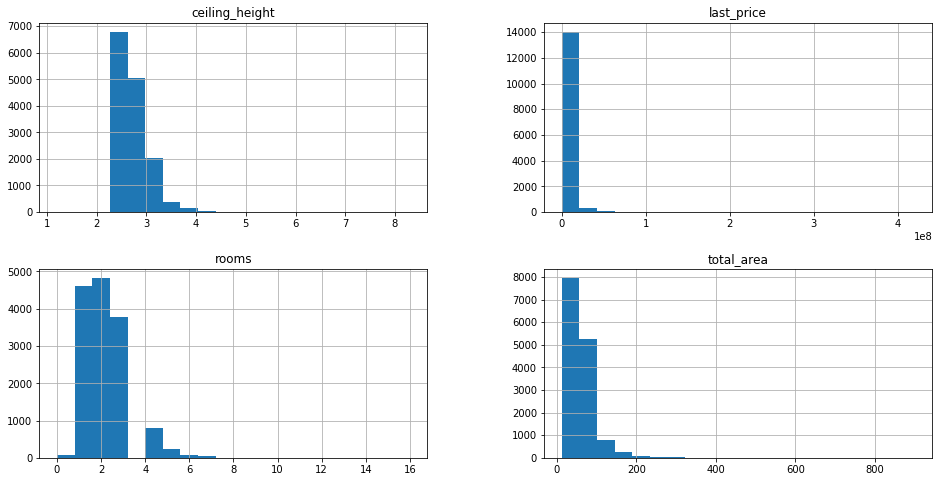

In [22]:
data[col_names].hist(figsize=figsize, bins=20); 

#### Вывод

1. Очень много выбросов в данных, это иллюстрирует график Boxplot. 
2. Большая часть квартир (75%) имеет площадь ниже 70 кв. м.
3. Самыми популярными оказались квартиры, имеющие меньше 3 комнат (включая границу). 
4. Средняя цена квартиры 6.5 млн рублей.

### Анализ времени продажи квартиры

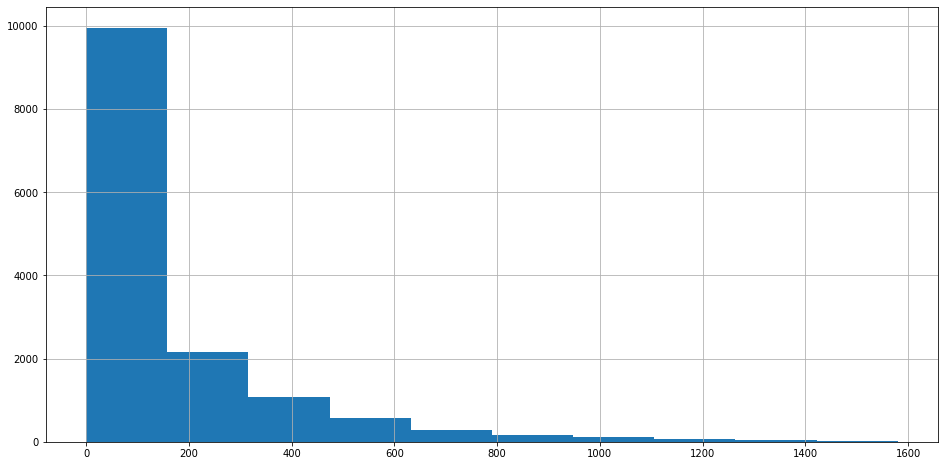

In [23]:
data['days_exposition'].hist(figsize=figsize);

In [24]:
data['days_exposition'].mean().round(2)

158.21

In [25]:
data['days_exposition'].median().round(2)

72.0

In [26]:
data['days_exposition'].quantile(.25).round(2)

16.75

In [27]:
data['days_exposition'].quantile(.75).round(2)

202.0

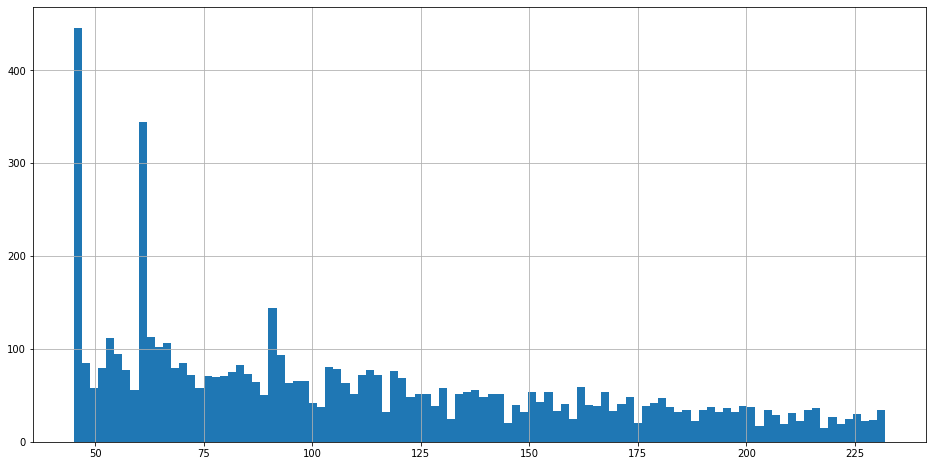

In [28]:
data.query('45 <= days_exposition <= 232')['days_exposition'].hist(figsize=figsize, bins=100);

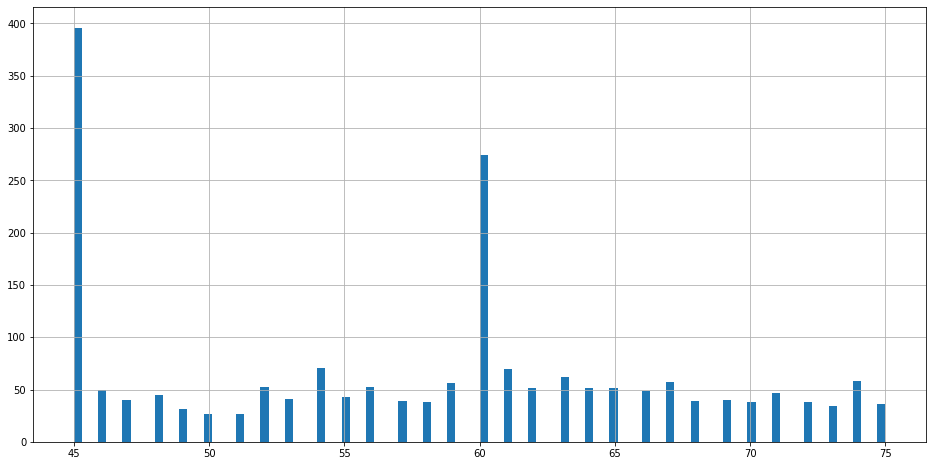

In [29]:
data.query('45 <= days_exposition <= 75')['days_exposition'].hist(figsize=figsize, bins=100);

In [30]:
for col in col_names + ['days_exposition']:
    q1 = data[col].quantile(0.25)                 
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    
    filter_by_col = (data[col] >= (q1 - 1.5*iqr)) & (data[col] <= (q3 + 1.5*iqr))
    data = data[filter_by_col]


data = data.reset_index(drop=True)
print(data.shape)
data.head()

(11156, 30)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,city_centers_nearest_cat,price_square_meter,week_day,month,year,floor_category,living_area_part,kitchen_area_part
0,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121,В пределах города,100000.00,1,6,2018,Другой,0.32,0.41
1,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,289,В пределах города,88524.59,6,2,2017,Другой,0.71,0.11
2,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,553.0,137,В пределах города,127525.25,3,11,2017,Другой,0.51,0.21
3,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,298.0,366,Область,82943.93,5,7,2017,Последний,0.63,0.12
4,11,6700000,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,NaN,397,В пределах города,81707.32,3,11,2017,Первый,0.68,0.11


#### Вывод

1. В среднем квартиры продаются за 180 дней.
2. Большая часть квартир (75%) была продана менее чем за 232 дня. 

По неизвестным причинам через 45 и 60 дней с момента размещения объявления было продано больше квартир, чем в любые другие дни.

### Зависимость цены от квадратного метра, числа комнат, этажа, удалённости от центра

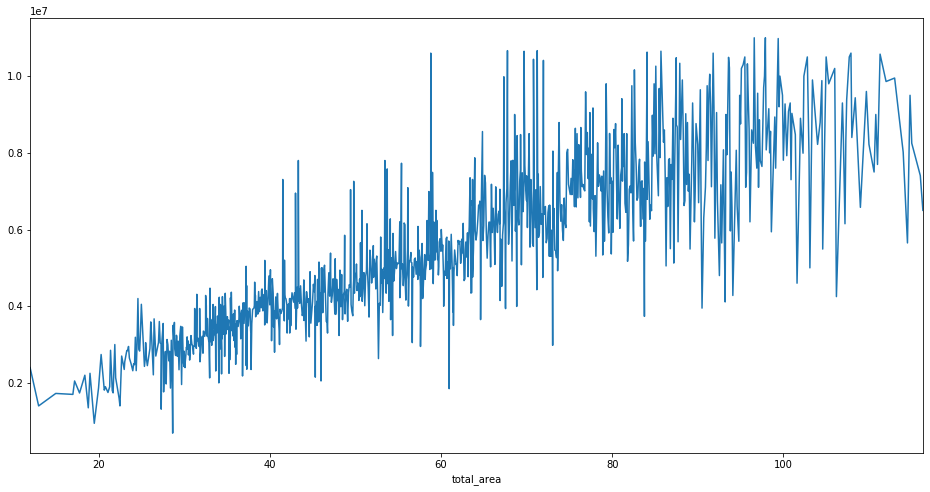

In [31]:
data.groupby('total_area')['last_price'].mean().plot(figsize=figsize);

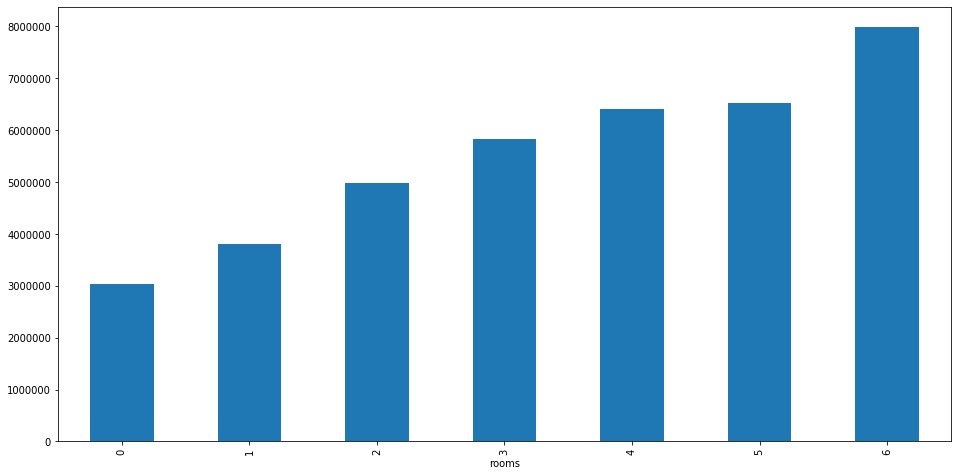

In [32]:
data.groupby('rooms')['last_price'].mean().plot.bar(figsize=figsize);

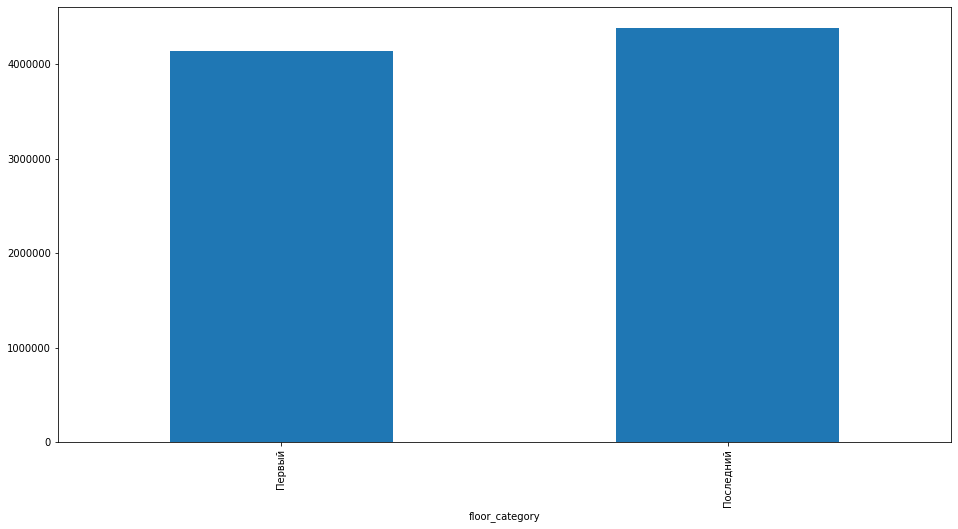

In [33]:
data.query('floor_category != "Другой"')\
.groupby('floor_category')['last_price'].mean()\
.plot.bar(figsize=figsize);

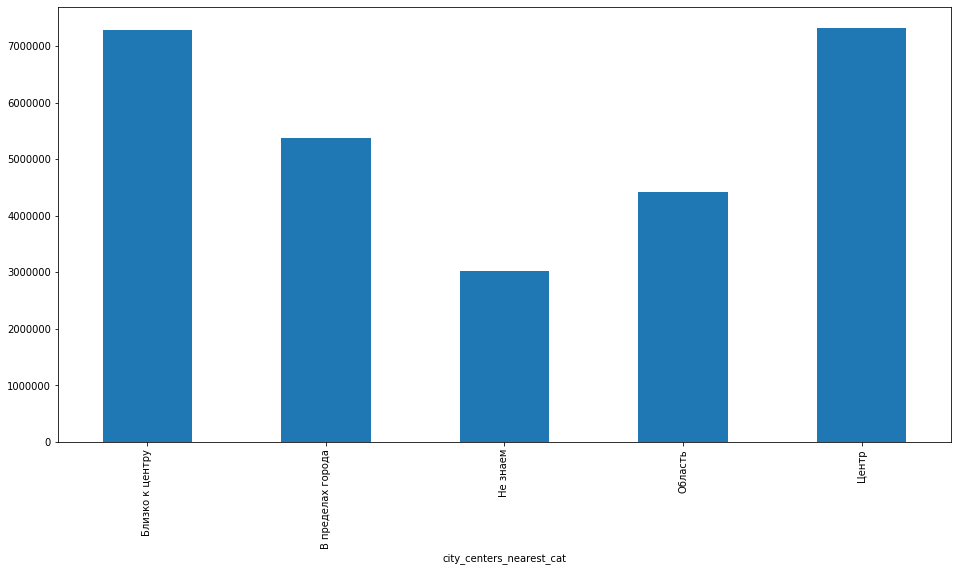

In [34]:
data.groupby('city_centers_nearest_cat')['last_price'].mean().plot.bar(figsize=figsize);

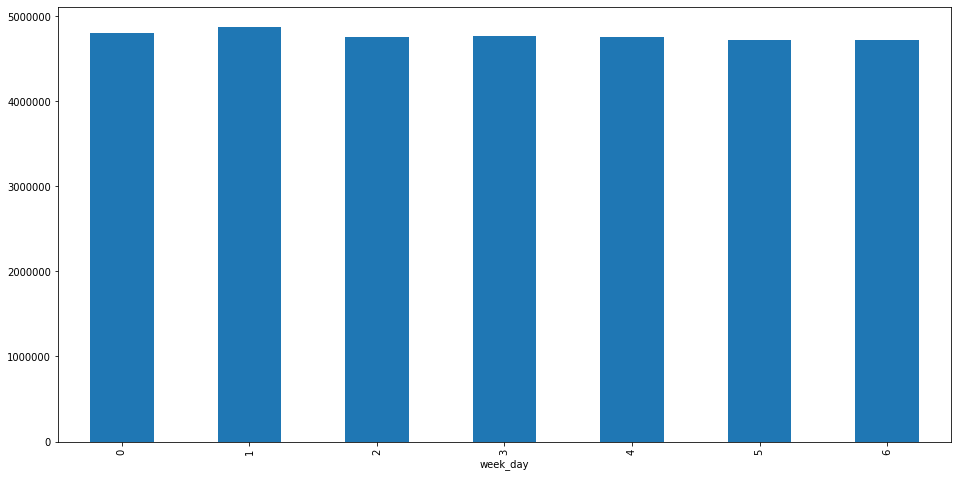

In [35]:
data.groupby('week_day')['last_price'].mean().plot.bar(figsize=figsize);

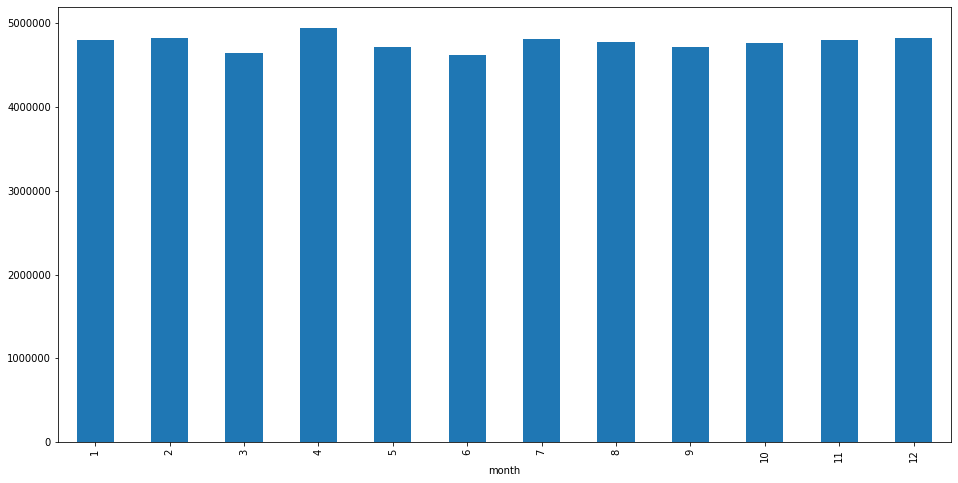

In [36]:
data.groupby('month')['last_price'].mean().plot.bar(figsize=figsize);

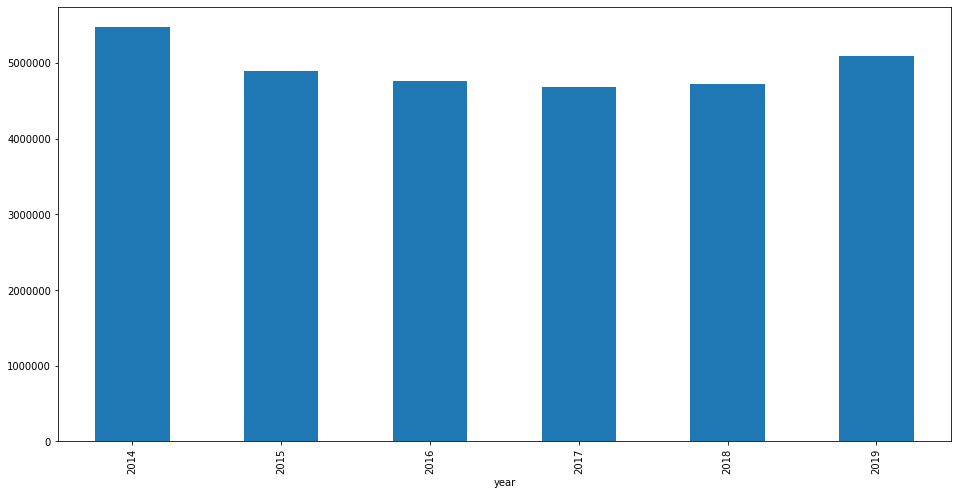

In [37]:
data.groupby('year')['last_price'].mean().plot.bar(figsize=figsize);

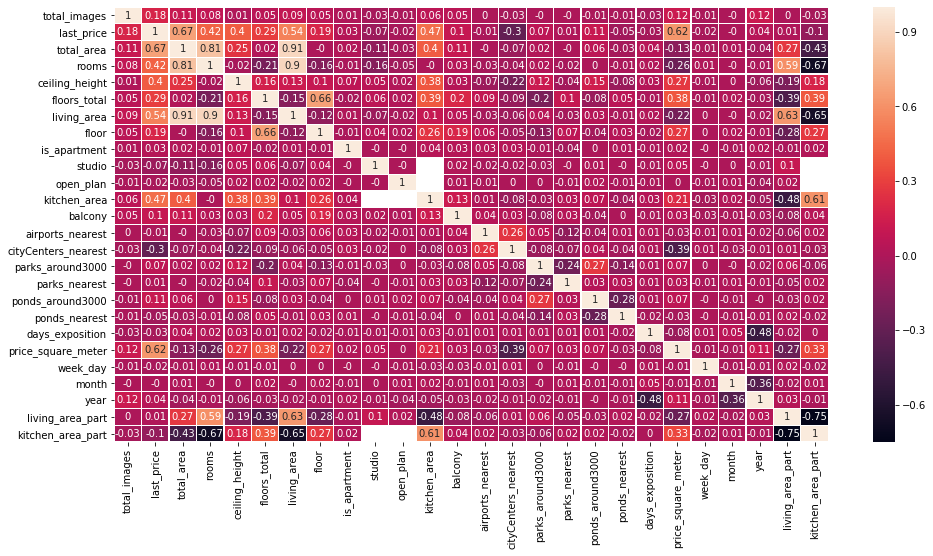

In [38]:
fig, ax = plt.subplots(figsize=figsize) 
ax = sns.heatmap(data.corr().round(2), linewidths=.2,  annot=True)

#### Вывод

1. Начения с 2015 года мы видим динамику уменьшения цен на квартиры. 
2. Квартиры, расположенные на последнем этаже намного дороже квартир, расположенных на первом. 
3. Стоимость квартир практически не зависит от дня недели или месяца совершения сделки.

### Анализ 10 населённых пунктов с наибольшим числом объявлений

In [39]:
data['locality_name'] = data['locality_name'].str.replace('поселок', '')
data['locality_name'] = data['locality_name'].str.replace('деревня', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа', '')
data['locality_name'] = data['locality_name'].str.strip()

In [40]:
locality_name_top_10 = data['locality_name'].value_counts().to_frame('count').head(10).index
print(*locality_name_top_10, sep='\n')

санкт-петербург
всеволожск
мурино
шушары
колпино
пушкин
кудрово
гатчина
парголово
петергоф


In [41]:
data[data['locality_name'].isin(locality_name_top_10)]\
.groupby('locality_name')['price_square_meter'].mean().reset_index()

,locality_name,price_square_meter
0,всеволожск,67137.136583
1,гатчина,70144.889084
2,колпино,75790.705414
3,кудрово,96438.475376
4,мурино,88440.088614
5,парголово,90672.571756
6,петергоф,83653.027759
7,пушкин,100236.386298
8,санкт-петербург,105763.959567
9,шушары,79713.053719


In [42]:
data.groupby('locality_name')['price_square_meter'].mean()\
.reset_index().sort_values('price_square_meter', ascending=False).head(10)

,locality_name,price_square_meter
121,мистолово,107121.683333
182,санкт-петербург,105763.959567
59,зеленогорск,104144.450588
194,сестрорецк,100602.600000
168,пушкин,100236.386298
96,кудрово,96438.475376
175,репино,92727.270000
143,парголово,90672.571756
210,стрельна,89110.727727
148,песочный,88642.730000


In [43]:
data.groupby('locality_name')['price_square_meter'].mean()\
.reset_index().sort_values('price_square_meter', ascending=True).head(10)

,locality_name,price_square_meter
13,вахнова кара,11688.310
199,совхозный,12555.560
52,ефимовский,12686.570
231,фалилеево,13303.770
55,житково,15648.290
158,почап,16037.740
11,важины,16666.670
192,серебрянский,16756.295
128,никольский,16977.775
241,ялгино,17659.090


#### Вывод

Больше всего объявлений о продаже квартир в следующих населенных пунктах: 
1. санкт-петербург
2. всеволожск
3. мурино
4. шушары
5. колпино
6. пушкин
7. кудрово
8. гатчина
9. парголово
10. петергоф

Самые дорогие помещения в следующих населенных пунктах:
1. мистолово
2. санкт-петербург
3. зеленогорск

Самые дешевые помещения в следующих населенных пунктах:
1. вахнова кара
2. совхозный
3. ефимовский

### Анализ квартир в Санкт-Петербурге

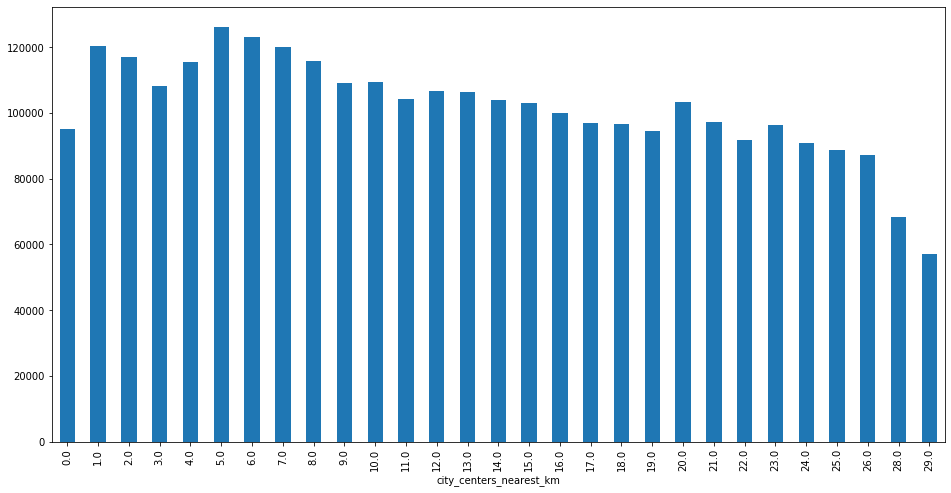

In [44]:
spb_data = data.query('locality_name == "санкт-петербург"').reset_index(drop=True)
spb_data['city_centers_nearest_km'] = round(spb_data['cityCenters_nearest'] / 1000)

spb_data.groupby('city_centers_nearest_km')['price_square_meter'].mean()\
.plot.bar(figsize=figsize);

In [45]:
spb_data_center = spb_data[spb_data['city_centers_nearest_km'] < 7].reset_index(drop=True)
spb_data_center[col_names].describe().round(2)

,total_area,last_price,rooms,ceiling_height
count,660.00,660.00,660.00,660.00
mean,62.16,7108468.78,2.22,2.85
std,20.68,1970066.27,0.98,0.18
min,12.00,1600000.00,0.00,2.40
25%,45.88,5700000.00,1.00,2.71
50%,61.00,7100000.00,2.00,2.90
75%,76.50,8500000.00,3.00,3.00
max,114.80,11000000.00,6.00,3.12


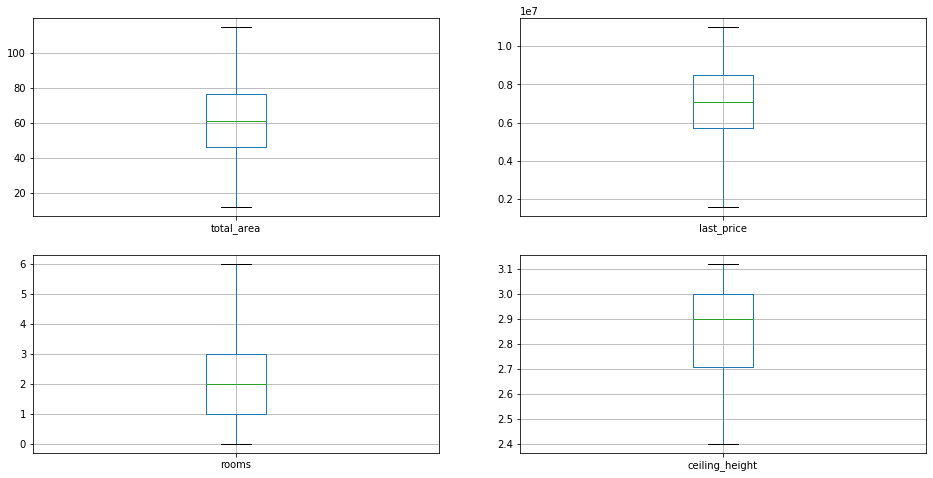

In [46]:
fig, axes = plt.subplots(2, 2, figsize=figsize)

y = 0
for col_name in col_names:
    i, j = divmod(y, 2)
    spb_data_center.boxplot(column=[col_name], ax = axes[i, j])
    y = y + 1

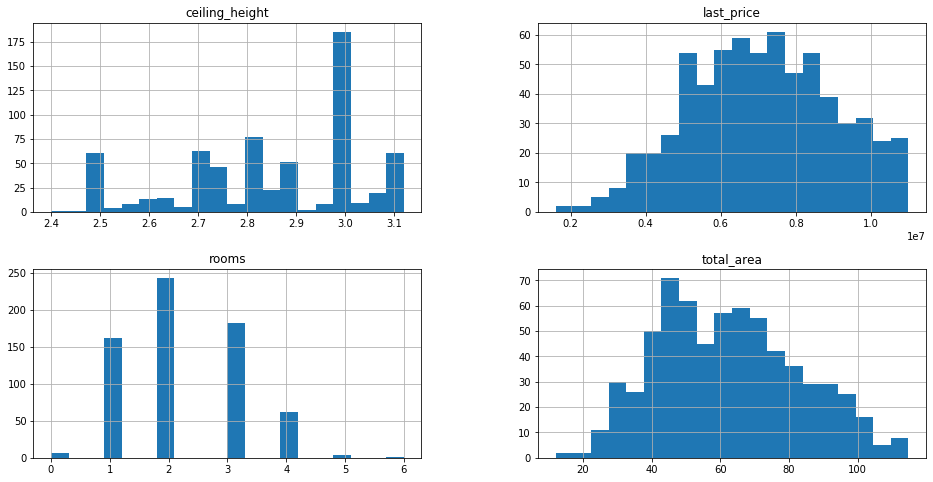

In [47]:
spb_data_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].hist(figsize=figsize, bins=20); 

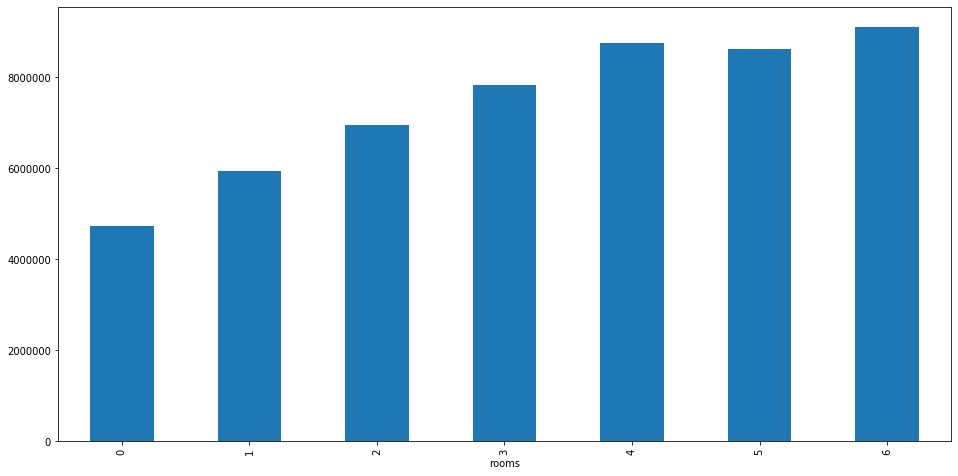

In [48]:
spb_data_center.groupby('rooms')['last_price'].mean().plot.bar(figsize=figsize);

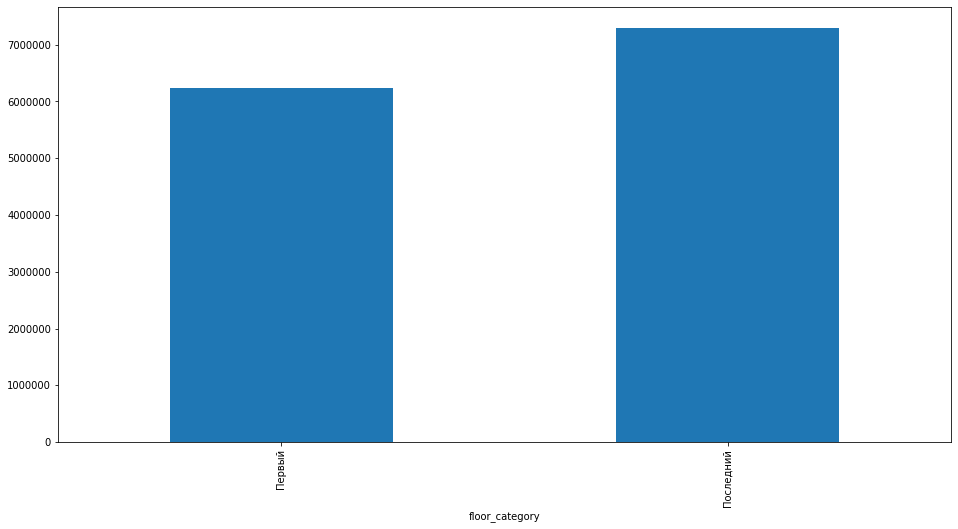

In [49]:
spb_data_center.query('floor_category != "Другой"')\
.groupby('floor_category')['last_price'].mean()\
.plot.bar(figsize=figsize);

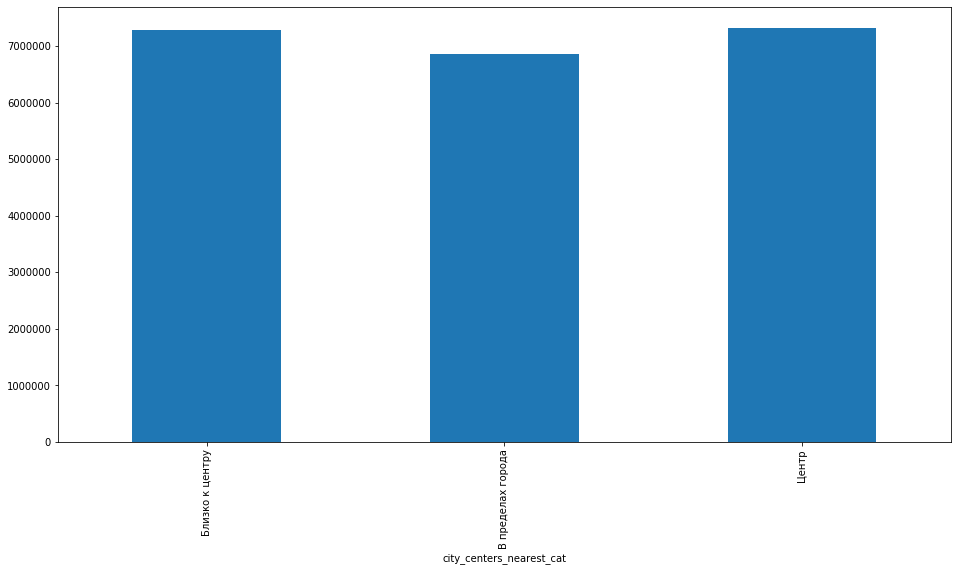

In [50]:
spb_data_center.groupby('city_centers_nearest_cat')['last_price'].mean().plot.bar(figsize=figsize);

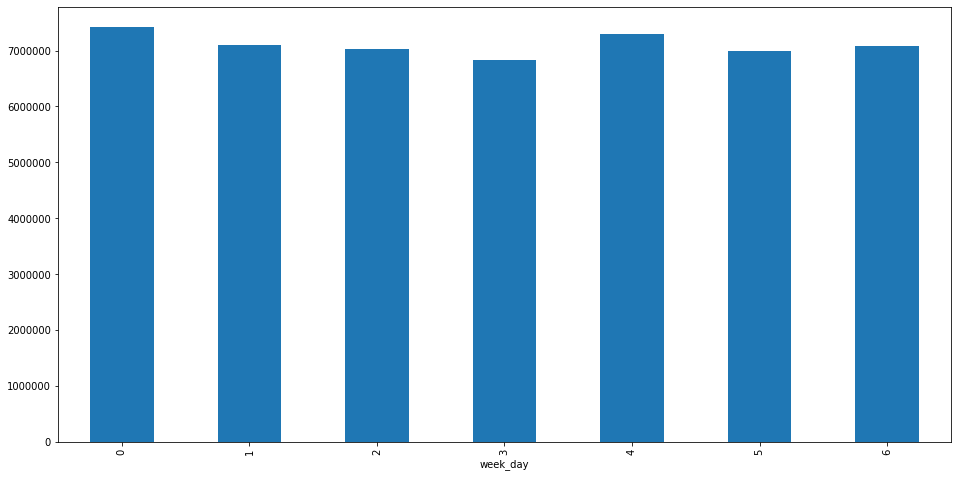

In [51]:
spb_data_center.groupby('week_day')['last_price'].mean().plot.bar(figsize=figsize);

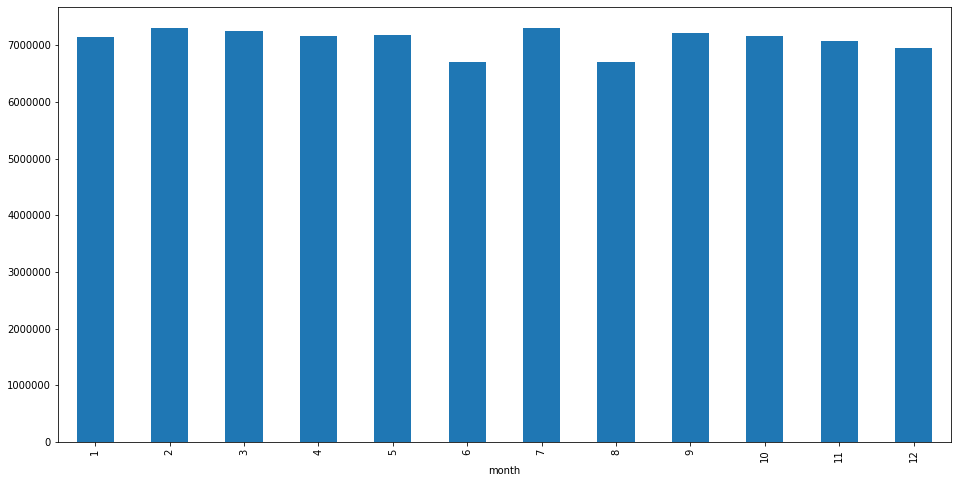

In [52]:
spb_data_center.groupby('month')['last_price'].mean().plot.bar(figsize=figsize);

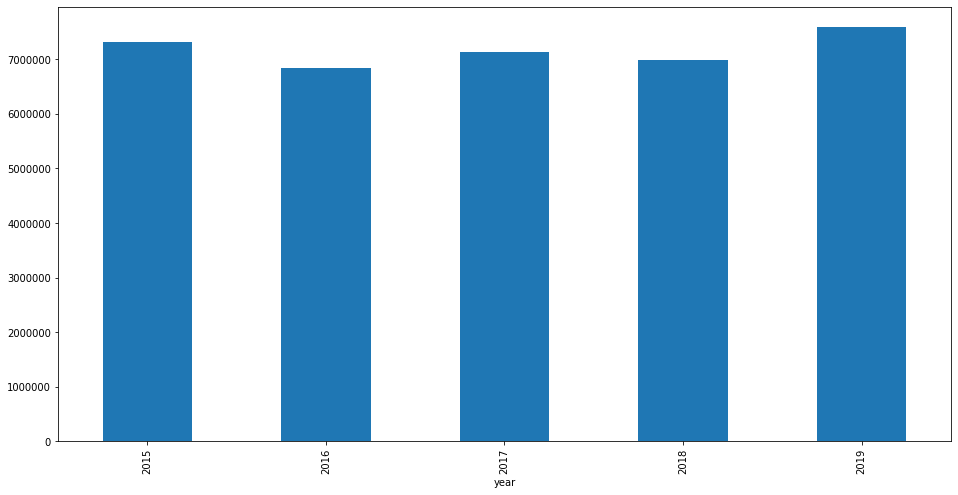

In [53]:
spb_data_center.groupby('year')['last_price'].mean().plot.bar(figsize=figsize);

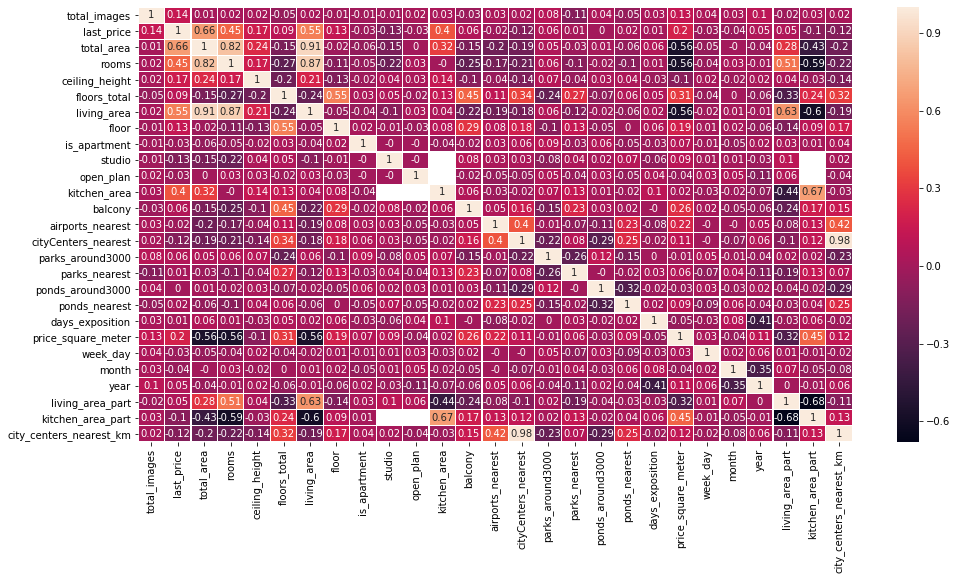

In [54]:
fig, ax = plt.subplots(figsize=figsize) 
ax = sns.heatmap(spb_data_center.corr().round(2), linewidths=.2,  annot=True)

#### Сравнительный анализ

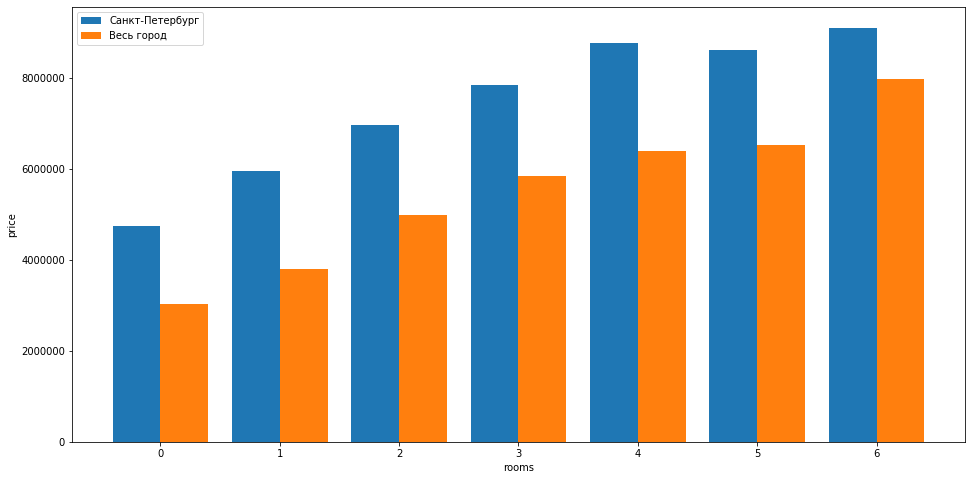

In [55]:
fig, ax = plt.subplots(figsize=figsize) 

X = spb_data_center.groupby('rooms')['last_price'].mean().index
X_axis = np.arange(len(X))

plt.bar(
    X_axis - 0.2, 
    spb_data_center.groupby('rooms')['last_price'].mean(), 
    0.4, label = 'Санкт-Петербург'
)

plt.bar(
    X_axis + 0.2, 
    data.groupby('rooms')['last_price'].mean(), 
    0.4, label = 'Весь город'
)

plt.xticks(X_axis, X)
plt.xlabel('rooms')
plt.ylabel("price")
plt.legend()
plt.show()

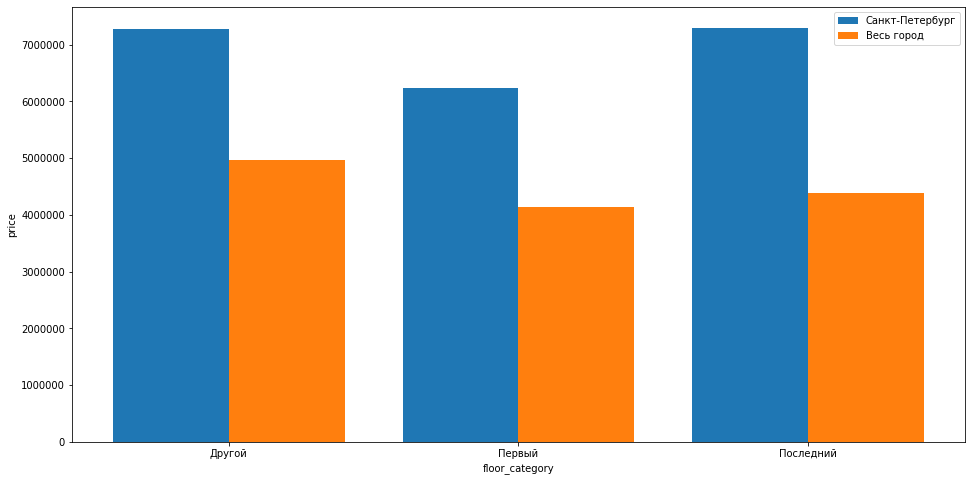

In [56]:
fig, ax = plt.subplots(figsize=figsize) 

X = spb_data_center.groupby('floor_category')['last_price'].mean().index
X_axis = np.arange(len(X))

plt.bar(
    X_axis - 0.2, 
    spb_data_center.groupby('floor_category')['last_price'].mean(), 
    0.4, label = 'Санкт-Петербург'
)

plt.bar(
    X_axis + 0.2, 
    data.groupby('floor_category')['last_price'].mean(), 
    0.4, label = 'Весь город'
)

plt.xticks(X_axis, X)
plt.xlabel('floor_category')
plt.ylabel("price")
plt.legend()
plt.show()

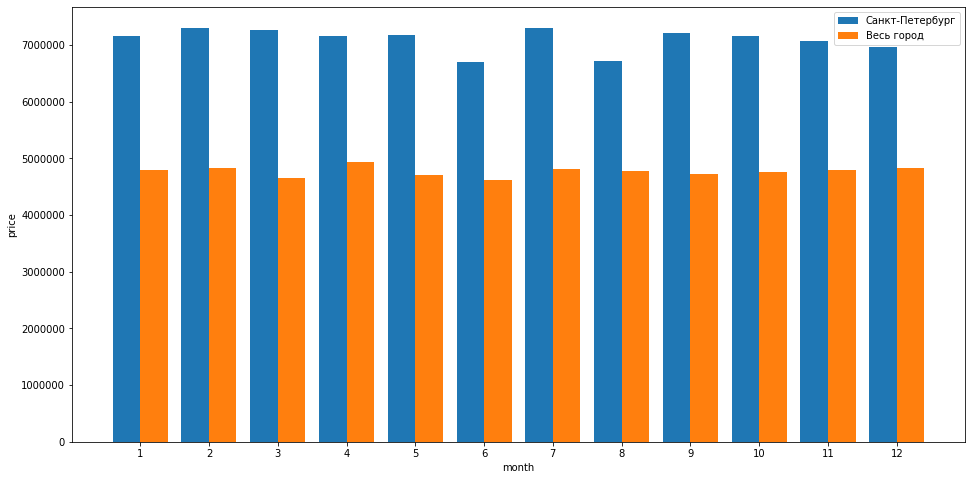

In [57]:
fig, ax = plt.subplots(figsize=figsize) 

X = spb_data_center.groupby('month')['last_price'].mean().index
X_axis = np.arange(len(X))

plt.bar(
    X_axis - 0.2, 
    spb_data_center.groupby('month')['last_price'].mean(), 
    0.4, label = 'Санкт-Петербург'
)

plt.bar(
    X_axis + 0.2, 
    data.groupby('month')['last_price'].mean(), 
    0.4, label = 'Весь город'
)

plt.xticks(X_axis, X)
plt.xlabel('month')
plt.ylabel("price")
plt.legend()
plt.show()

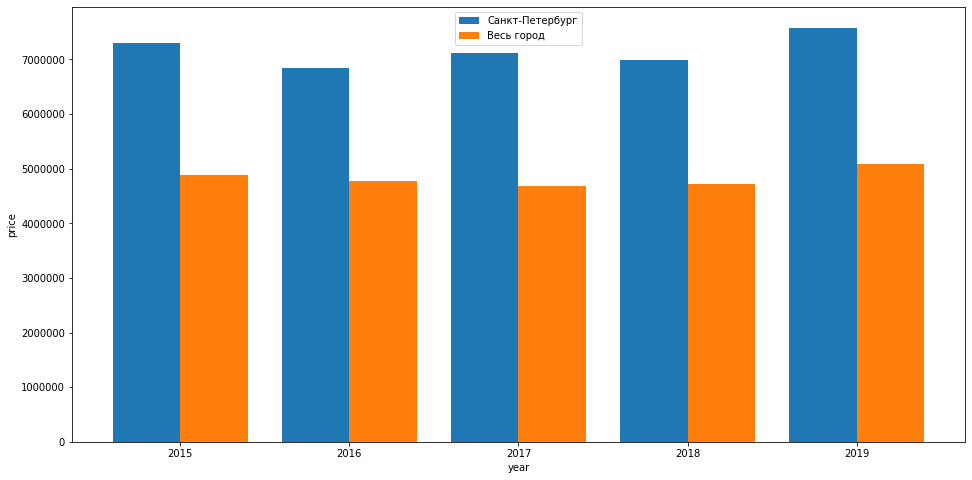

In [58]:
fig, ax = plt.subplots(figsize=figsize) 

X = spb_data_center.groupby('year')['last_price'].mean().index
X_axis = np.arange(len(X))

plt.bar(
    X_axis - 0.2, 
    spb_data_center.groupby('year')['last_price'].mean(), 
    0.4, label = 'Санкт-Петербург'
)

plt.bar(
    X_axis + 0.2, 
    data.groupby('year')['last_price'].mean()[1:], 
    0.4, label = 'Весь город'
)

plt.xticks(X_axis, X)
plt.xlabel('year')
plt.ylabel("price")
plt.legend()
plt.show()

#### Вывод

Проанализировав как изменяется цена за квадратный метр при отдалении от центра Санкт-Петербурга, мы выяснили, что центром можно счиать полигон, радиусом 7км. Исходня из сравнительного анализа, мы видим, что цена на квартиры в центре значительно выше чем у остальных квартир. Однако динамика изменения цены на квартиры в центре такая же как у рынка в целом.

## Общий вывод

Начиная с 2015 года цена квартир снижается. Цена квартир сильно зависит от их площади, расположения от центра, количества комнат. Квартиры, расположенные на первом этаже значительно дешевле квартир на последнем. Средний срок продажи квартиры 180 дней. На текущий момент, самыми популярными помещения являются двух/трех комнатные квартры площадью 40/70 квадратных метров соответственно.